# Part 3.7: Unsupervised Learning - Anomaly Detection

Anomaly detection (or outlier detection) is the identification of rare items, events, or observations which raise suspicions by differing significantly from the majority of the data. This is an unsupervised task as we don't have pre-labeled examples of anomalies.

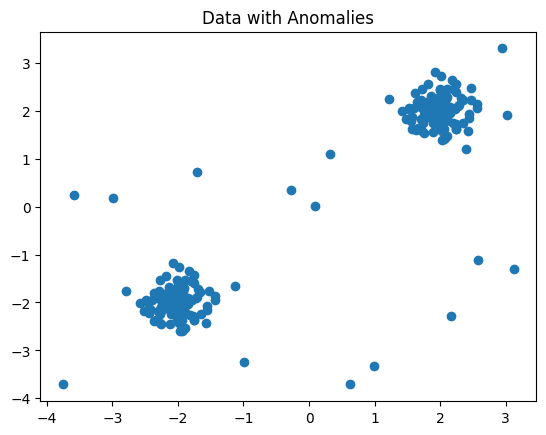

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Generate some data with anomalies
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_full = np.concatenate([X_train, X_outliers])

plt.scatter(X_full[:, 0], X_full[:, 1])
plt.title('Data with Anomalies')
plt.show()

### Isolation Forest
This algorithm 'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic is that anomalies are 'few and different,' which makes them easier to isolate than normal points.

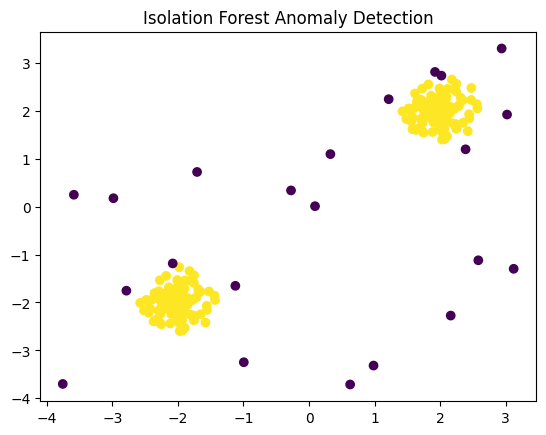

In [2]:
# contamination: the expected proportion of outliers in the data set
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_full)

# Predictions are -1 for outliers and 1 for inliers
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_pred_iso, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

### One-Class SVM
A One-Class SVM is trained only on the 'normal' data. It learns a boundary that encompasses the normal data points. When a new point is observed, it is classified as an anomaly if it falls outside this boundary.

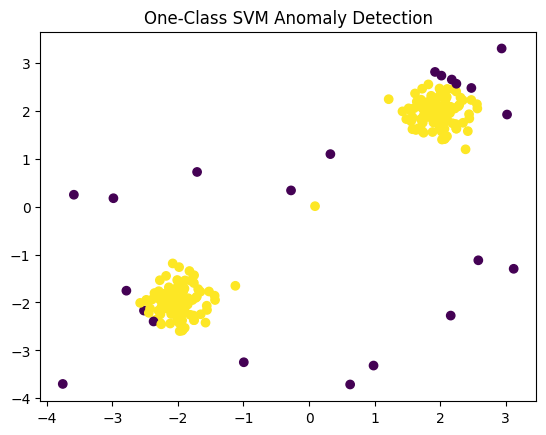

In [3]:
# nu: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
one_class_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
y_pred_svm = one_class_svm.fit_predict(X_full)

plt.scatter(X_full[:, 0], X_full[:, 1], c=y_pred_svm, cmap='viridis')
plt.title('One-Class SVM Anomaly Detection')
plt.show()